In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_json("results/data-2019-08-20.json")

In [4]:
df.sample(n=20, random_state=42)

,duration,i,n,name
138024,2088699224,204.0,10000,create
1912765,492614417,709.0,1000,create
598350,2898355381,5969.0,10000,read
363267,2969697967,3167.0,10000,create
854460,3498432852,5344.0,10000,create
1252679,3342290609,3459.0,10000,create
2054075,3839769750,4647.0,10000,create
1433727,3970911717,6683.0,10000,create
1015903,1773150561,3416.0,10000,delete
908576,2647947388,5003.0,10000,read


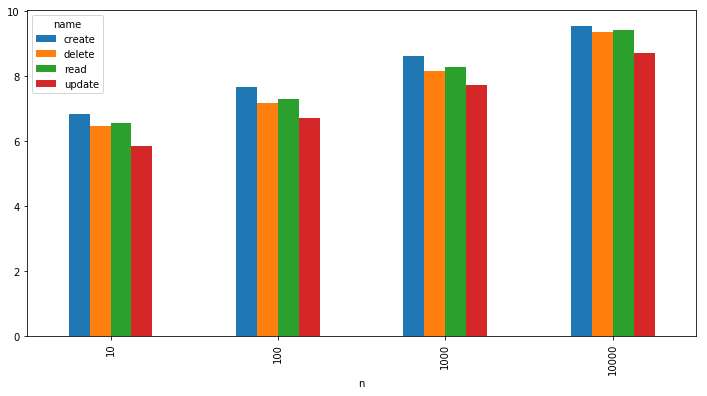

In [5]:
data = df[~df['name'].str.contains('Map')].groupby(['name', 'n'])['duration'].mean().unstack().T
data.apply(np.log10).plot.bar()

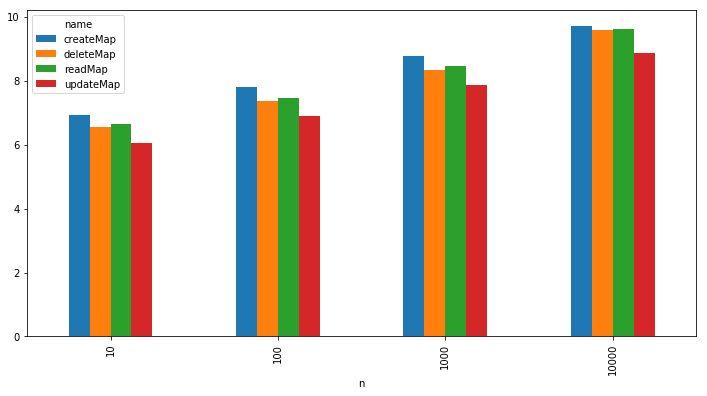

In [6]:
data = df[df['name'].str.contains('Map')].groupby(['name', 'n'])['duration'].mean().unstack().T
data.apply(np.log10).plot.bar()

In [7]:
data = df[df['name'].str.contains('read')].groupby(['name', 'n'])['duration'].mean().unstack().T
data

name,read,readMap
n,,
10,3.532103e+06,4.393520e+06
100,2.011716e+07,2.889989e+07
1000,1.946289e+08,2.851548e+08
10000,2.585088e+09,4.295771e+09
